In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import datetime
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

Tree and Forest

# 1 Read data

In [2]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

### Review training datset

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

# 2 EDA and clean data

In [4]:
TARGET_COLUMN = 'Price'
CATEGORY_COLUMNS = df_train.select_dtypes(include=object).columns.tolist()
NUMBER_COLUMNS = df_train.select_dtypes(exclude=object).columns.tolist()

In [7]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [3]:
# column Rooms have outlier (0, 10, 19)
df_train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

c:\users\user\desktop\data-science\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rooms')

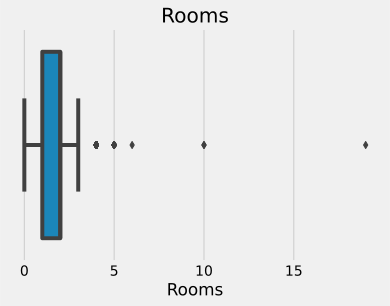

In [4]:
sns.boxplot(df_train["Rooms"])
plt.title('Rooms')

In [14]:
# column KitchenSquare is too large
df_train['KitchenSquare'].sort_values().tail(10)

5273      73.0
3956      75.0
2831      78.0
2785      84.0
2454      96.0
7733     112.0
5002     112.0
286      123.0
6505    1970.0
9520    2014.0
Name: KitchenSquare, dtype: float64

In [31]:
# column HouseFloor have outlier (0, values > Floor)
df_train['HouseFloor'].sort_values()

2768      0.0
1928      0.0
5104      0.0
6870      0.0
6860      0.0
        ...  
5031     48.0
4987     48.0
746      99.0
4657     99.0
1678    117.0
Name: HouseFloor, Length: 10000, dtype: float64

In [35]:
# column Floor need check for valid vs column HouseFloor
df_train['Floor'].sort_values()

4982     1
9869     1
9392     1
7845     1
3195     1
        ..
1360    32
7984    32
2383    33
7599    37
4987    42
Name: Floor, Length: 10000, dtype: int64

In [41]:
# HouseYear column must not have more then curent date
df_train['HouseYear'].sort_values()

6794        1910
2795        1912
2066        1912
6250        1914
7610        1916
          ...   
8296        2020
2350        2020
7246        2020
8828        4968
9163    20052011
Name: HouseYear, Length: 10000, dtype: int64

In [44]:
# LifeSquare column have NaN and outlier
df_train.loc[~df_train['LifeSquare'].isna(), 'LifeSquare'].sort_values()

3113       0.370619
1829       0.641822
119        0.795539
9869       0.873147
6882       1.049867
           ...     
357      263.542020
7010     410.639749
5183     461.463614
9229     638.163193
8000    7480.592129
Name: LifeSquare, Length: 7887, dtype: float64

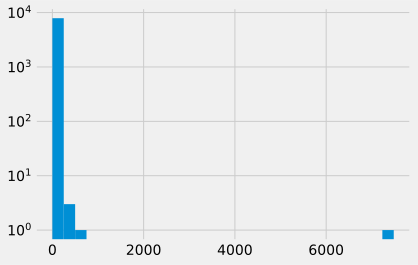

In [55]:
plt.hist(df_train['LifeSquare'], bins=30)
plt.yscale(value='log')

In [5]:

class DataPreprocessing:
    def __init__(self):
        self.median = None
        self.quantile_kitchen_square_975 = None

    def transform_df(self, df):
        df = self.room_preprocessing(df)
        df = self.kitchen_preprocessing(df)
        df = self.house_floor_preprocessing(df)
        df = self.floor_preprocessing(df)
        df = self.house_year_preprocessing(df)
        df = self.life_square_preprocessing(df)
        return df

    def fit_median_quantile(self, df):
        self.median = df.median()
        self.quantile_kitchen_square_975 = df['KitchenSquare'].quantile(0.975)

    @staticmethod
    def data_astype(df):
        df['Id'] = df['Id'].astype(str)
        df['DistrictId'] = df['DistrictId'].astype(str)

    def room_preprocessing(self, df):
        df = self.room_outlier(df)
        df.loc[df_train['Rooms'] == 0, 'Rooms'] = 1
        df.loc[df_train['Rooms'] > 6, 'Rooms'] = df['Rooms'].median()
        return df

    def kitchen_preprocessing(self, df):
        filter = (df['KitchenSquare'] > self.quantile_kitchen_square_975) |\
                 (df['KitchenSquare'].isna())

        df.loc[filter, 'KitchenSquare'] = self.median['KitchenSquare']
        df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        return df

    def house_floor_preprocessing(self, df):
        df = self.house_floor_outlier(df)
        df.loc[(df['HouseFloor'] == 0) |
                    (df['HouseFloor'] > 95), 'HouseFloor'] = self.median['HouseFloor']
        return df

    def floor_preprocessing(self, df):
        floor_outlier_index = df.loc[df['Floor'] > df['HouseFloor']].index

        df.loc[floor_outlier_index, 'Floor'] = df.loc[floor_outlier_index, 'HouseFloor']\
            .apply(lambda x: random.randint(1, x))
        return df

    def house_year_preprocessing(self, df):
        curent_data = datetime.datetime.now().year

        df.loc[df['HouseYear'] > curent_data, 'HouseYear'] = curent_data
        return df

    def life_square_preprocessing(self, df):
        life_square_condition = (df['LifeSquare'].isna()) &\
                        (~df['Square'].isna()) &\
                        (~df['KitchenSquare'].isna())

        df.loc[life_square_condition, 'LifeSquare'] = df.loc[life_square_condition, 'Square'] -\
                                                    df.loc[life_square_condition, 'KitchenSquare']
        return df

    def room_outlier(self, df):
        df['Rooms_outlier'] = 0
        df.loc[(df['Rooms'] == 0) | (df['Rooms'] > 6), 'Rooms_outlier'] = 1
        return df

    def house_floor_outlier(self, df):
        df['HouseFloor_outlier'] = 0
        df.loc[df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        df.loc[df['HouseFloor'] < df['Floor'], 'HouseFloor_outlier'] = 1
        return df

data_preprocessing = DataPreprocessing()
data_preprocessing.fit_median_quantile(df_train)
data_preprocessing.transform_df(df_train)
data_preprocessing.transform_df(df_test)

# data_preprocessing.data_astype(df_train)
# data_preprocessing.data_astype(df_test)

C:\Users\User\AppData\Local\Temp/ipykernel_6712/2914361575.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  self.median = df.median()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Rooms_outlier,HouseFloor_outlier
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,B,24,4378,0,1036.0,1,1,B,0,0
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,...,B,2,629,1,NaN,0,0,A,0,0
2,960,27,2.0,59.463678,50.463678,9.0,19,19.0,1977,0.211401,...,B,9,1892,0,NaN,0,1,B,0,0
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,B,2,475,0,NaN,0,0,B,0,0
4,746,74,1.0,53.837056,50.837056,3.0,8,17.0,1977,0.309479,...,B,35,7715,4,990.0,0,6,B,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,1,5.0,1962,0.069660,...,B,31,6119,4,NaN,1,2,B,0,1
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,...,B,15,2787,2,520.0,0,7,B,0,0
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,...,B,28,6533,1,1015.0,2,5,B,0,0
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,...,B,33,7976,5,NaN,0,11,B,0,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  10000 non-null  int32  
 1   DistrictId          10000 non-null  int32  
 2   Rooms               10000 non-null  float64
 3   Square              10000 non-null  float64
 4   LifeSquare          10000 non-null  float64
 5   KitchenSquare       10000 non-null  float64
 6   Floor               10000 non-null  int64  
 7   HouseFloor          10000 non-null  float64
 8   HouseYear           10000 non-null  int64  
 9   Ecology_1           10000 non-null  float64
 10  Ecology_2           10000 non-null  object 
 11  Ecology_3           10000 non-null  object 
 12  Social_1            10000 non-null  int64  
 13  Social_2            10000 non-null  int64  
 14  Social_3            10000 non-null  int64  
 15  Healthcare_1        5202 non-null   float64
 16  Helth

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   object 
 1   DistrictId          5000 non-null   object 
 2   Rooms               5000 non-null   float64
 3   Square              5000 non-null   float64
 4   LifeSquare          5000 non-null   float64
 5   KitchenSquare       5000 non-null   float64
 6   Floor               5000 non-null   int64  
 7   HouseFloor          5000 non-null   float64
 8   HouseYear           5000 non-null   int64  
 9   Ecology_1           5000 non-null   float64
 10  Ecology_2           5000 non-null   object 
 11  Ecology_3           5000 non-null   object 
 12  Social_1            5000 non-null   int64  
 13  Social_2            5000 non-null   int64  
 14  Social_3            5000 non-null   int64  
 15  Healthcare_1        2623 non-null   float64
 16  Helthc

In [74]:
def reduce_mem_df(df):
    start_mem = df.memory_usage().sum() / 1024
    print(f'Memory usage start {start_mem} KB')

    for column in df.columns:
        col_type = df[column].dtype

        if col_type.kind != 'O':
            col_min = df[column].min()
            col_max = df[column].max()

            if df[column].dtype.kind == 'i':
                for int_param in [np.int8, np.int16, np.int32]:
                    if col_min > np.iinfo(int_param).min and col_max < np.iinfo(int_param).max:
                        df[column] = df[column].astype(int_param)
            else:
                for float_param in [np.float16, np.float32]:
                    if col_min > np.finfo(float_param).min and col_max < np.finfo(float_param).max:
                        df[column] = df[column].astype(float_param)
        else:
            df[column] = df[column].astype('category')

    end_mem = df.memory_usage().sum() / 1024
    print(f'memory after reduce {end_mem}')

### Built new sign

In [61]:
# 'Ecology_2', 'Ecology_3', 'Shops_2' columns have dtypes = object
df_train.select_dtypes(include=object)

,Id,DistrictId,Ecology_2,Ecology_3,Shops_2
0,11809,27,B,B,B
1,3013,22,B,B,B
2,8215,1,B,B,B
3,2352,1,B,B,B
4,13866,94,B,B,B
...,...,...,...,...,...
9995,1260,61,B,B,B
9996,16265,27,B,B,A
9997,2795,178,B,B,B
9998,14561,21,B,B,B


In [81]:
# DistrictId column is Identifier of the region, let's make a new feature by
# frequency of occurrence
df_train['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictId, Length: 205, dtype: int64

In [88]:
# Generate sign PriceMedian_district for group DistrictId and Rooms
df_district_id = df_train.groupby(['DistrictId', 'Rooms'], as_index=False)\
.agg({'Price': 'median'}).rename(columns={'Price': 'PriceMedian_district'})
df_district_id

,DistrictId,Rooms,PriceMedian_district
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126
...,...,...,...
663,98,4.0,450946.459365
664,99,1.0,158539.052715
665,99,2.0,187254.720362
666,99,3.0,223960.229617


Text(0, 0.5, 'count')

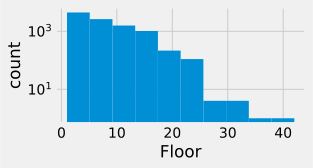

In [96]:
plt.figure(figsize=(4, 2))
plt.hist(df_train['Floor'], log=True)
plt.xlabel('Floor')
plt.ylabel('count')

In [98]:
# Generate sign Floor_category for Floor
pd.cut(df_train['Floor'], (df_train['Floor'].min(), 3, 8, 13, df_train['Floor'].max() + 1), labels=False, right=False)

0       1
1       1
2       0
3       2
4       3
       ..
9995    1
9996    3
9997    1
9998    1
9999    2
Name: Floor, Length: 10000, dtype: int64

In [100]:
# Generate sign Year_category for Year
df_train['HouseYear'].sort_values()

6794    1910
2795    1912
2066    1912
6250    1914
7610    1916
        ... 
8296    2020
2350    2020
7246    2020
9163    2022
8828    2022
Name: HouseYear, Length: 10000, dtype: int64

Text(0.5, 1.0, 'Price of Year')

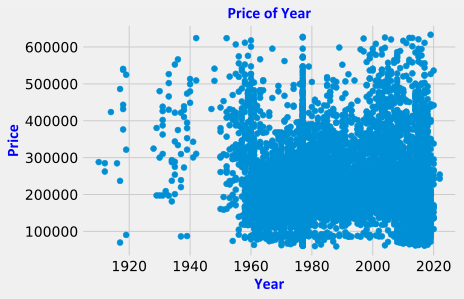

In [18]:
font_dict = {'fontsize': 16, 'fontweight': 'bold', 'family': 'calibri', 'color': 'blue'}
plt.scatter(df_train['HouseYear'], df_train['Price'])
plt.xlabel('Year', fontdict=font_dict)
plt.ylabel('Price', fontdict=font_dict)
plt.title('Price of Year', fontdict=font_dict)

In [6]:
class FeatureGenerator:

    def __init__(self, df):
        self.df_median = df.median()
        self.price_median_district_df = pd.DataFrame()
        self.price_median_year_df = pd.DataFrame()

    def feature_generate(self, df):
        self.binary_replace(df)
        df = self.district_size(df)
        self.district_big(df)
        self.floor_category(df)
        self.year_category(df)
        if 'Price' in df.columns:
            df = self.price_median_district(df)
            df = self.price_median_year(df)
        else:
            df = self.price_median_district_test(df)
            df = self.price_median_year_test(df)
        return df

    def binary_replace(self, df):
        sign_to_binary = {'A': 0, 'B': 1}

        df['Ecology_2'] = df['Ecology_2'].replace(sign_to_binary)
        df['Ecology_3'] = df['Ecology_3'].replace(sign_to_binary)
        df['Shops_2'] = df['Shops_2'].replace(sign_to_binary)

    def district_size(self, df):
        df_district_id = df['DistrictId'].value_counts().reset_index().rename(columns={'index': 'DistrictId', 'DistrictId':'DistrictSize'})
        return df.merge(df_district_id, on='DistrictId', how='left')

    def district_big(self, df):
        df['District_big'] = (df['DistrictSize'] > 100).astype(int)

    def floor_category(self, df):
        df['Floor_category'] = pd.cut(df['Floor'], (df['Floor'].min(), 3, 8, 13, df['Floor'].max() + 1), labels=False, right=False)
        df['Floor_category'].fillna(-1, inplace=True)

    def year_category(self, df):
        bins_bool = (df['HouseYear'].min()-1, 1950, 2000, df['HouseYear'].max())
        df_year_cut = pd.cut(df['HouseYear'], bins=bins_bool, labels=False)
        df_year_cut.fillna(-1, inplace=True)
        df['Year_category'] = df_year_cut

    def price_median_district(self, df):
        df_med_price_group = df.groupby(['DistrictId', 'Rooms'], as_index=False)\
            .agg({'Price': 'median'}).rename(columns={'Price': 'PriceMedian_district'})
        df = df.merge(df_med_price_group, on=['DistrictId', 'Rooms'], how='left')
        self.price_median_district_df = df_med_price_group
        return df

    def price_median_year(self, df):
        median_price_year_floor = df.groupby(['Year_category', 'Floor_category'], as_index=False)\
            .agg({'Price':'median'}).rename(columns={'Price': 'PriceMedian_year'})
        df = df.merge(median_price_year_floor, on=['Year_category', 'Floor_category'], how='left')
        self.price_median_year_df = median_price_year_floor
        return df

    def price_median_district_test(self, df):
        df = df.merge(self.price_median_district_df, on=['DistrictId', 'Rooms'], how='left')
        df['PriceMedian_district'].fillna(self.price_median_district_df['PriceMedian_district'].mean(), inplace=True)
        return df

    def price_median_year_test(self, df):
        df = df.merge(self.price_median_year_df, on=['Year_category', 'Floor_category'], how='left')
        df['PriceMedian_year'].fillna(self.price_median_year_df['PriceMedian_year'].mean(), inplace=True)
        return df

    @staticmethod
    def drop_sign(df):
        df.drop(['Id', 'DistrictId'], axis=1, inplace=True)

    def replace_fillna_median(self, df):
        df.fillna(self.df_median, inplace=True)


feat_generation = FeatureGenerator(df_train)
df_train = feat_generation.feature_generate(df_train)
df_test = feat_generation.feature_generate(df_test)

C:\Users\User\AppData\Local\Temp/ipykernel_6712/2651460330.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  self.df_median = df.median()


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    5000 non-null   int64  
 1   DistrictId            5000 non-null   int64  
 2   Rooms                 5000 non-null   float64
 3   Square                5000 non-null   float64
 4   LifeSquare            5000 non-null   float64
 5   KitchenSquare         5000 non-null   float64
 6   Floor                 5000 non-null   int64  
 7   HouseFloor            5000 non-null   float64
 8   HouseYear             5000 non-null   int64  
 9   Ecology_1             5000 non-null   float64
 10  Ecology_2             5000 non-null   int64  
 11  Ecology_3             5000 non-null   int64  
 12  Social_1              5000 non-null   int64  
 13  Social_2              5000 non-null   int64  
 14  Social_3              5000 non-null   int64  
 15  Healthcare_1         

column LifeSquare and Healthcare_1

In [12]:
df_train.loc[~df_train['Healthcare_1'].isnull(), 'Healthcare_1'].sort_values()

8420       0.0
8153      30.0
3442      30.0
3502      30.0
8130      30.0
         ...  
5838    4849.0
4234    4849.0
9181    4849.0
5236    4849.0
7060    4849.0
Name: Healthcare_1, Length: 5202, dtype: float64

In [14]:
print(df_train['Healthcare_1'].mode(), ' mode')
print(df_train['Healthcare_1'].mean(), ' mean')
print(df_train['Healthcare_1'].median(), ' median')

0    540.0
dtype: float64  mode
1142.9044598231449  mean
900.0  median


Text(0.5, 1.0, 'PRICE / HEALTHCARE_1')

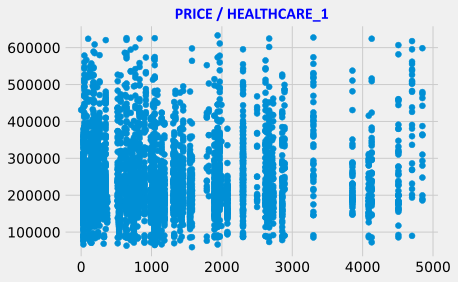

In [19]:
plt.scatter(df_train['Healthcare_1'], df_train['Price'])
plt.title('PRICE / HEALTHCARE_1', fontdict=font_dict)

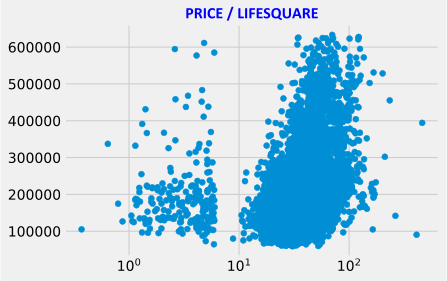

In [25]:
plt.scatter(df_train["LifeSquare"], df_train['Price'])
plt.title('PRICE / LIFESQUARE', fontdict=font_dict)
plt.xscale(value='log')

In [8]:
def column_healthcare_1(df):
    healthcare_1_mean = df_train['Healthcare_1'].mean()
    df['Healthcare_1_outlier'] = 0
    df.loc[df['Healthcare_1'].isna(), 'Healthcare_1_outlier'] = 1
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = healthcare_1_mean
    df.loc[df['LifeSquare'] > 500, 'LifeSquare'] = df['LifeSquare'].median()
    df['LifeSquare'] = df['LifeSquare'].fillna(df['LifeSquare'].mean())


column_healthcare_1(df_train)
column_healthcare_1(df_test)

In [12]:
reduce_mem_df(df_train)
reduce_mem_df(df_train)

Memory usage start 2304.6875 KB
memory after reduce 1210.9375
Memory usage start 1210.9375 KB
memory after reduce 1210.9375


In [ ]:
pd.set_option('display.max_columns', False)
df_train.describe()

In [32]:
df_train.to_pickle('df_train.pkl')
df_test.to_pickle('df_test.pkl')

# 3 split on train and test

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DistrictId            10000 non-null  int32  
 1   Rooms                 10000 non-null  float32
 2   Square                10000 non-null  float32
 3   LifeSquare            10000 non-null  float32
 4   KitchenSquare         10000 non-null  float32
 5   Floor                 10000 non-null  int32  
 6   HouseFloor            10000 non-null  float32
 7   HouseYear             10000 non-null  int32  
 8   Ecology_1             10000 non-null  float32
 9   Ecology_2             10000 non-null  int32  
 10  Ecology_3             10000 non-null  int32  
 11  Social_1              10000 non-null  int32  
 12  Social_2              10000 non-null  int32  
 13  Social_3              10000 non-null  int32  
 14  Healthcare_1          10000 non-null  float32
 15  Helthcare_2         

In [32]:
CATEGORY_COLUMNS = ['DistrictId', 'Rooms', 'Ecology_1', 'Ecology_2', 'Shops_1', 'Helthcare_2', 'Rooms_outlier', 'HouseFloor_outlier',
                   'District_big', 'Floor_category', 'Year_category', 'Healthcare_1_outlier', 'DistrictSize', 'PriceMedian_year', 'PriceMedian_district']
NUMBER_COLUMNS = df_train.columns.drop(CATEGORY_COLUMNS).tolist()
NUMBER_COLUMNS.remove(TARGET_COLUMN)

df_train.drop(columns='Id', inplace=True)

def data_split(df, test_size, random_state):
    x = df.drop('Price', axis=1)
    y = df['Price']

    return train_test_split(x, y, test_size=test_size, random_state=random_state)

x_train, x_valid, y_train, y_valid = data_split(df_train, 0.25, 49)

# 4 Data scaled and building model

i used model scaled- StandardScale


In [36]:
scaler = StandardScaler()

x_train[NUMBER_COLUMNS] = scaler.fit_transform(x_train[NUMBER_COLUMNS])
x_valid[NUMBER_COLUMNS] = scaler.transform(x_valid[NUMBER_COLUMNS])

In [37]:
def model_tree_regression(max_deep, max_feat, x_train, y_train, x_valid):
    tree_model = DecisionTreeRegressor(max_depth=max_deep, max_features=max_feat, random_state=49)
    tree_model.fit(x_train, y_train)
    y_pred_valid = tree_model.predict(x_valid)
    y_pred_train = tree_model.predict(x_train)

    return y_pred_train, y_pred_valid


y_pred_train, y_pred_valid = model_tree_regression(5, 5, x_train, y_train, x_valid)

print(r2_score(y_valid, y_pred_valid), ' Valid')
print(r2_score(y_train, y_pred_train), ' Train')

# 0.5891021673531118  Valid
# 0.6318116999106264  Train

In [50]:
a = np.arange(2, 18)

r2_valid_list = list()
r2_train_list = list()
for val in a:
    y_pred_train, y_pred_valid = model_tree_regression(max_deep=5, max_feat=val, x_train=x_train, y_train=y_train, x_valid=x_valid)
    r2_tr = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_valid, y_pred_valid)
    r2_valid_list.append(r2_val)
    r2_train_list.append(r2_tr)
    # print(r2_tr, f' Train where max_depth={val}', '\n',
    #       r2_val, f'Valid where max_depth={val}', '\n')

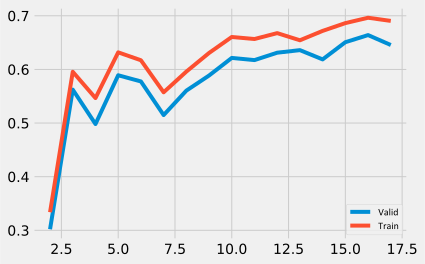

In [53]:
font_dict = {'family': 'Calibri', 'size':10}
plt.plot(a, r2_valid_list, label='Valid')
plt.plot(a, r2_train_list, label='Train')
plt.legend(loc='lower right', prop=font_dict)
# plt.xlim(2, 10)

## Decision Tree Regression give best result when parameters
## max_depth = 5
## max_feat = 16

In [54]:
y_pred_train, y_pred_valid = model_tree_regression(5, 16, x_train, y_train, x_valid)

print(r2_score(y_valid, y_pred_valid), ' Valid', sep='\t')
print(r2_score(y_train, y_pred_train), ' Train', sep='\t')

# I was able too better result metric r2
# 0.6640177950826547  Valid
# 0.696328759930289	  Train

0.6640177950826547	 Valid
0.696328759930289	 Train


In [58]:
NUMBER_COLUMNS

['Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Shops_2']

In [68]:
df_test[NUMBER_COLUMNS] = scaler.transform(df_test[NUMBER_COLUMNS])
test_id = df_test['Id']
df_test.drop(columns='Id', inplace=True)

class TreeModelRegression:
    def __init__(self, x_train, x_valid, y_train, y_valid):
        self.x_train = x_train
        self.x_valid = x_valid
        self.y_train = y_train
        self.y_valid = y_valid

    def create_and_fit_model(self, depth, feature):
        self.tree_model = DecisionTreeRegressor(max_depth=depth, max_features=feature)
        self.tree_model.fit(self.x_train, self.y_train)

    def get_predict_train(self):
        return self.tree_model.predict(self.x_train)

    def r2_score_for_train(self):
        return r2_score(self.y_train, self.get_predict_train())

    def get_predict_valid(self):
        return self.tree_model.predict(self.x_valid)

    def r2_score_for_valid(self):
        return r2_score(self.y_valid, self.get_predict_valid())

    def get_predict_test(self, df):
        return self.tree_model.predict(df)


model_tree = TreeModelRegression(x_train, x_valid, y_train, y_valid)
model_tree.create_and_fit_model(5, 16)
print(model_tree.r2_score_for_train(), 'TRAIN', sep='\t')
print(model_tree.r2_score_for_valid(), 'VALID', sep='\t')
predict_test = model_tree.get_predict_test(df_test)


# 0.7098839214031978	TRAIN
# 0.6689143358100561	VALID

0.7098839214031978	TRAIN
0.6689143358100561	VALID


In [72]:
predict_test_df = pd.DataFrame({'Id': test_id, 'Price': predict_test}, columns=['Id', 'Price'])
predict_test_df

,Id,Price
0,4567,167009.879077
1,5925,127167.039927
2,960,149652.730501
3,3848,149652.730501
4,746,167009.879077
...,...,...
4995,10379,184215.002296
4996,16138,437809.686588
4997,3912,167009.879077
4998,5722,167009.879077


Save result

In [76]:
reduce_mem_df(predict_test_df)
predict_test_df.to_csv('Simakov_Ya_tree_predict.csv', index=False, encoding='utf-8')
